<a href="https://colab.research.google.com/github/wndgua0468/machine_learning/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_7%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


심층 신경망으로 이미지 분류
1. 이미지 데이테셋 로드
2. 이미지 데이터넷 정규화 : 수렴속도 증가
3. DenseLayer 에 입력하기 위한 차워축소 : reshape():shape
4. 모델 생성( DenseLayer(노드수, 활성화 함수))
5. complie(): 컴파일(옵티마이저, 손실함수, 평가지표)
6. fit():훈련
7. evaluate(): 검증
8. predicr():예측



1. 데이테셋 업로드

In [9]:
##1. 데이테셋 업로드
mnist = tf.keras.datasets.mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

4-1 가중치 초기화
1. he_normal : 활성화 함수가 relu 인 경우 사용
2. glorot_uniform : 활성화 함수가  sigmoid, Tanh 인 경우 사용


In [11]:
##kernel_initializer = 'uniform'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'uniform', activation = 'relu')

In [12]:
##kernel_initializer = 'normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'normal', activation = 'relu')

In [21]:
##kernel_initializer = 'he_normal'
dense = tf.keras.layers.Dense(256,kernel_initializer = 'he_normal', activation = 'relu')

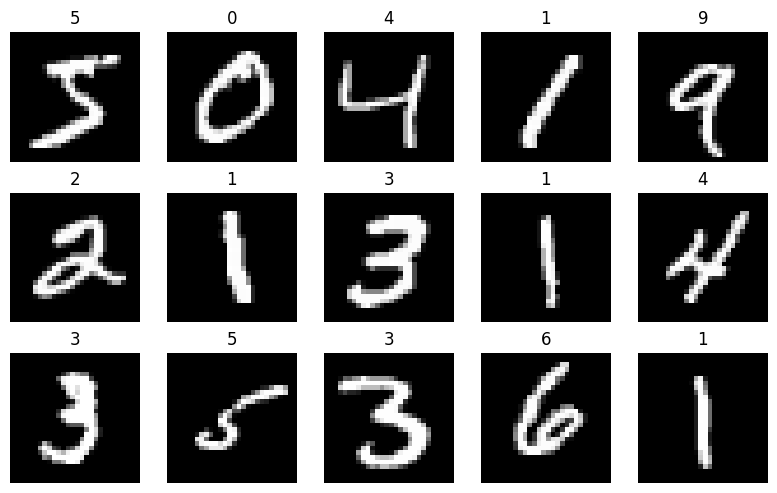

In [40]:
##데이커 시각화
fig,axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
  ax = axes[i//5, i%5]
  ax.imshow(x_train[i], cmap = 'gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))
  
plt.tight_layout()
plt.show()


3. 차원축소

In [41]:
##차원축소
x_train.reshape(60000, -1).shape

(60000, 784)

In [42]:
tf.keras.layers.Flatten()(x_train).shape

TensorShape([60000, 784])

활성화 함수:출력 함수

In [43]:
tf.keras.layers.Dense(128, activation='relu')

입력과 출력

In [ ]:
##출력층이 1인 경우
tf.keras.layers.Dense(1, activation=)

In [44]:
##출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10,activation='sigmoid')

손실함수

In [45]:
##출력 노드가 1개, sigmoid활성화 함수를 적용한 경우
model.compile(loss='binary_crossentropy')

In [46]:
##출력 노드가 2개이상 softmax활성화 함수를 적용한 경우
##y가 원 핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')
     

In [ ]:
##출력 노드가 2개 이상, 

옵티마이저: 손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 최적화 방법

In [48]:
#클래스 인스턴스로 지정
adam=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

평가지표

In [ ]:
# 클래스 인스턴스로 지정
acc = tf.keras

모델생성

In [17]:
##가중치를 적용하지 않은 경우
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                50240     
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.4067 - accuracy: 0.7573 - val_loss: 0.4713 - val_accuracy: 0.8743
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3659 - accuracy: 0.9050 - val_loss: 0.3353 - val_accuracy: 0.9239
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2513 - accuracy: 0.9326 - val_loss: 0.2376 - val_accuracy: 0.9397
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1907 - accuracy: 0.9481 - val_loss: 0.2364 - val_accuracy: 0.9392
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1588 - accuracy: 0.9558 - val_loss: 0.1837 - val_accuracy: 0.9517
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1415 - accuracy: 0.9603 - val_loss: 0.1596 - val_accuracy: 0.9579
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1200 - accuracy: 0.9661 - val_loss: 0.1763 - val_accuracy:

In [26]:

adam = tf.keras.optimizers.Adam(lr = 0.001)
acc =  tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = [acc])

모델훈련시 훈련데이터

In [23]:
##검증
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1369 - accuracy: 0.9657


[0.1369476169347763, 0.9656999707221985]

In [25]:
###keral_initializer = 'he_normal'을 적용한 경우
model_w_he = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, kernel_initializer = 'he_normal',activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model_w_he.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                50240     
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_w_he.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history_w_he = model_w_he.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.5278 - accuracy: 0.7799 - val_loss: 0.4509 - val_accuracy: 0.8903
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3628 - accuracy: 0.9084 - val_loss: 0.2825 - val_accuracy: 0.9242
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2349 - accuracy: 0.9368 - val_loss: 0.2219 - val_accuracy: 0.9398
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1914 - accuracy: 0.9483 - val_loss: 0.1908 - val_accuracy: 0.9491
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1603 - accuracy: 0.9556 - val_loss: 0.1871 - val_accuracy: 0.9494
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1463 - accuracy: 0.9589 - val_loss: 0.1943 - val_accuracy: 0.9491
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1294 - accuracy: 0.9649 - val_loss: 0.1609 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

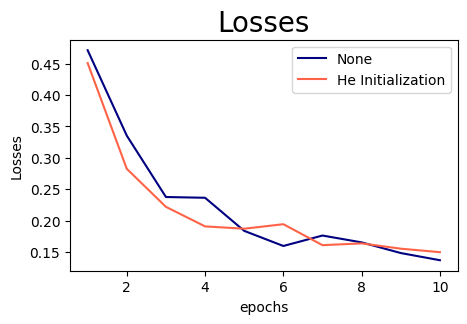

In [28]:
##두 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

In [29]:
###keral_initializer = 'glorot_normal'을 적용한 경우
model_w_gl = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, kernel_initializer = 'glorot_normal',activation = 'sigmoid'),
                             tf.keras.layers.Dense(32, activation = 'sigmoid'),
                             tf.keras.layers.Dense(10, activation = 'softmax')
])
model_w_gl.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [30]:
model_w_gl.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
history_w_gl = model_w_gl.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)
     

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.7716 - accuracy: 0.8109 - val_loss: 0.4385 - val_accuracy: 0.8768
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4132 - accuracy: 0.8773 - val_loss: 0.3815 - val_accuracy: 0.8823
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3683 - accuracy: 0.8888 - val_loss: 0.3525 - val_accuracy: 0.8930
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3569 - accuracy: 0.8930 - val_loss: 0.3241 - val_accuracy: 0.9031
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3262 - accuracy: 0.9012 - val_loss: 0.2975 - val_accuracy: 0.9071
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3193 - accuracy: 0.9020 - val_loss: 0.2914 - val_accuracy: 0.9122
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2961 - accuracy: 0.9107 - val_loss: 0.2857 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

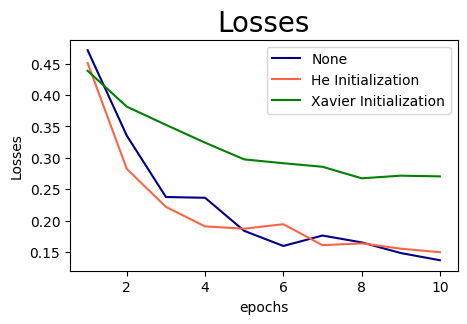

In [31]:
##세 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11), history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11), history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.plot(np.arange(1,11), history_w_gl.history['val_loss'], color = 'green', label = 'Xavier Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show

4-2 규제(Regularization)
1. L1 : 가중치의 절대값에 0.001을 곱하여 비용 추가, 0.001

2. L2 : 가중치의 제곱에 0.001을 곱하여 비용 추가, 0.001 

In [57]:
regularizer2 = tf.keras.regularizers.l2(0.001)
L2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,kernel_initializer='normal', kernel_regularizer2 = regularizer2, activation= 'relu')
    tf.keras.layers.Dense(32,kernel_initializer='normal', kernel_regularizer2= regularizer2, activation= 'relu')
    tf.keras.layers.Dense(10, activation='softmax')
])

SyntaxError: ignored

In [39]:
L2_model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
L2_model = L2_model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs = 10)

NameError: ignored

In [68]:
predictions = model.predict(x_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[0.0000000e+00, 4.3420964e-06, 2.4145820e-08, ..., 9.9999565e-01,
        1.4115648e-16, 1.3025587e-09],
       [1.8089965e-17, 2.0227671e-10, 9.9999994e-01, ..., 9.9052995e-11,
        2.7863916e-12, 4.6356083e-23],
       [1.5083948e-11, 9.9975288e-01, 1.9688610e-05, ..., 7.2235607e-06,
        1.3650437e-04, 5.6676612e-07],
       ...,
       [7.8680600e-09, 1.8454742e-13, 9.6659569e-10, ..., 1.3218149e-09,
        9.8970228e-11, 4.8158222e-07],
       [1.6044686e-09, 5.6482927e-23, 2.0528232e-21, ..., 9.1592845e-21,
        9.2174146e-10, 4.9813135e-15],
       [5.9379931e-07, 7.0120342e-13, 3.0604044e-10, ..., 1.0314121e-14,
        3.5902173e-07, 5.3574265e-17]], dtype=float32)

In [71]:
predictions[0].max()

0.99999565

In [72]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([0.0000000e+00, 4.3420964e-06, 2.4145820e-08, 2.2740686e-08,
       2.2135813e-09, 4.0702503e-16, 0.0000000e+00, 9.9999565e-01,
       1.4115648e-16, 1.3025587e-09], dtype=float32)

In [73]:
np.argmax(predictions[0])

7

In [74]:
def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx],np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img,y_true,y_pred,confidence

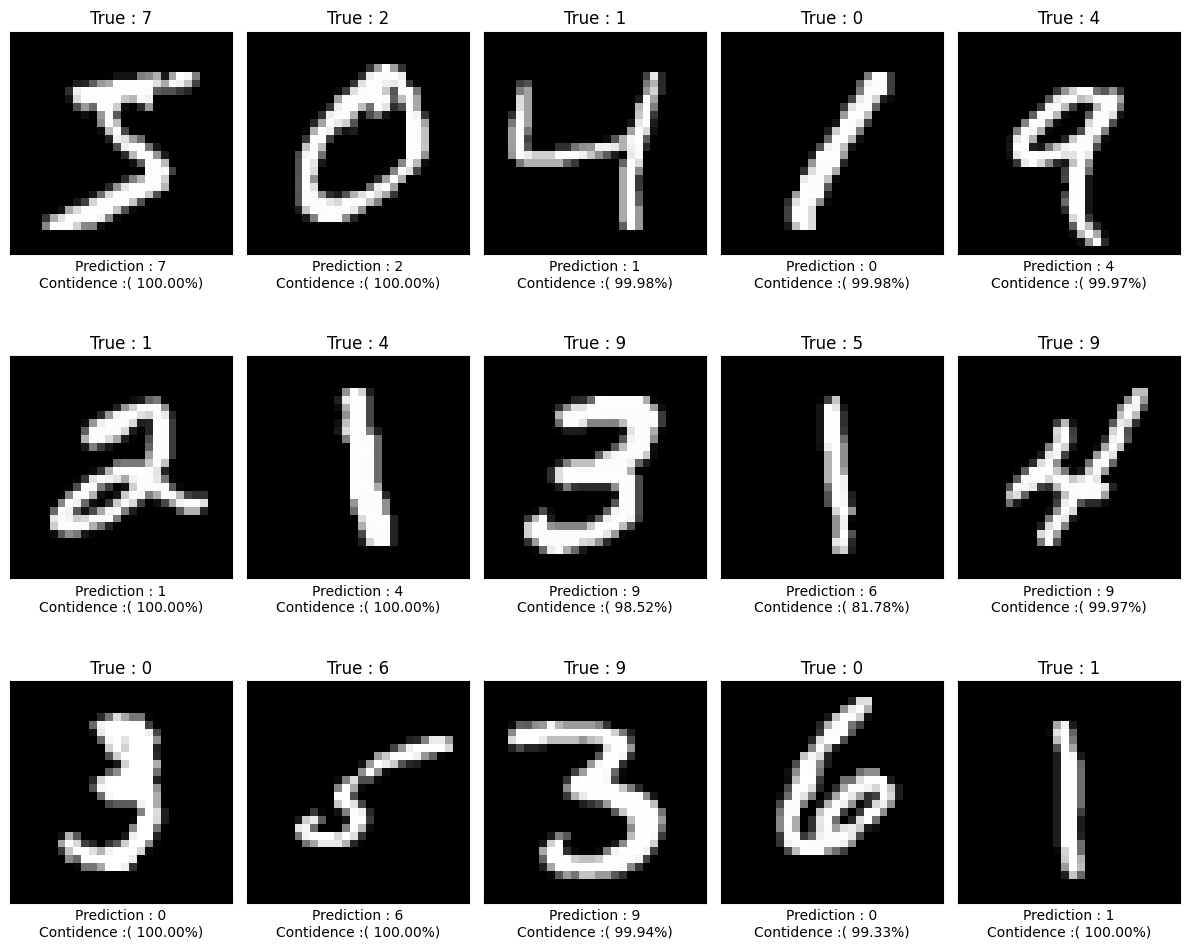

In [75]:
fig,axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
    ax = axes[i//5, i%5]
    img, y_true, y_pred, confidence = get_one_result(i)
    ax.imshow(x_train[i], cmap = 'gray')
    #x,y축 눈금
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True : {y_true}', fontsize=12)
    ax.set_xlabel(f'Prediction : {y_pred}\nContidence :( {confidence:.2f}%)',fontsize = 10)
plt.tight_layout()
plt.show()
